<a href="https://colab.research.google.com/github/mvgmarian/matematicas-ml/blob/master/notebooks/2-linear-algebra-ii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Álgebra Lineal II: Operaciones Matriciales

Este tema, *Álgebra lineal II: operaciones con matrices*, se basa en los fundamentos del álgebra lineal. Es esencial porque estas manipulaciones de nivel intermedio de tensores se encuentran en el corazón de la mayoría de los enfoques de aprendizaje automático y son especialmente predominantes en el aprendizaje profundo.

A través de la exposición mesurada de la teoría emparejada con ejemplos interactivos, desarrollará una comprensión de cómo se utiliza el álgebra lineal para resolver valores desconocidos en espacios de alta dimensión, así como para reducir la dimensionalidad de los espacios complejos. El contenido cubierto en este tema es en sí mismo fundamental para varios otros temas de la serie *Fundamentos del Aprendizaje Automático*, especialmente *Probabilidad y Teoría de la Información* y *Optimización*.

Over the course of studying this topic, you'll:

* Develop a geometric intuition of what’s going on beneath the hood of machine learning algorithms, including those used for deep learning.
* Be able to more intimately grasp the details of machine learning papers as well as all of the other subjects that underlie ML, including calculus, statistics, and optimization algorithms.
* Reduce the dimensionalty of complex spaces down to their most informative elements with techniques such as eigendecomposition, singular value decomposition, and principal component analysis.

**Tenga en cuenta que este cuaderno Jupyter no está diseñado para funcionar por sí solo. Es el código que acompaña a una clase o a los vídeos de la serie [Machine Learning Foundations](https://github.com/jonkrohn/ML-foundations) de Jon Krohn, que ofrecen detalles sobre lo siguiente:**

*Revisión de álgebra lineal introductoria

* Aplicaciones modernas de álgebra lineal
* Tensores, vectores y normas
* Multiplicación de matrices
* Inversión de matrices
* Matrices de identidad, diagonales y ortogonales

*Segmento 2: Eigendecomposición

* Transformación Afín mediante Aplicación Matricial
* Vectores y valores propios
* Determinantes matriciales
* Descomposición de matrices
* Aplicaciones de la Eigendecomposición

*Segmento 3: Operaciones Matriciales para el Aprendizaje Automático

* Descomposición de Valores Singulares (SVD)
* La pseudoinversa de Moore-Penrose
* El operador Trace
* Análisis de Componentes Principales (ACP): Un algoritmo sencillo de aprendizaje automático
* Recursos para profundizar en el álgebra lineal

## Segment0 1: Repaso de Introducción al álgebra lineal

In [2]:
import numpy as np
import torch

### Transposición de Vectores

In [3]:
x = np.array([25, 2, 5])
x

array([25,  2,  5])

In [4]:
x.shape

(3,)

In [5]:
x = np.array([[25, 2, 5]])
x

array([[25,  2,  5]])

In [6]:
x.shape

(1, 3)

In [7]:
x.T

array([[25],
       [ 2],
       [ 5]])

In [8]:
x.T.shape

(3, 1)

In [9]:
x_p = torch.tensor([25, 2, 5])
x_p

tensor([25,  2,  5])

In [10]:
x_p.T

/tmp/ipython-input-10-2382155321.py:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3725.)
  x_p.T


tensor([25,  2,  5])

In [11]:
x_p.view(3, 1) # "view" porque estamos cambiando la salida pero no la forma en que x se almacena en la memoria

tensor([[25],
        [ 2],
        [ 5]])

**Volver a las slides aquí.**

## Norma $L^2$

In [12]:
x

array([[25,  2,  5]])

In [13]:
(25**2 + 2**2 + 5**2)**(1/2)

25.573423705088842

In [14]:
np.linalg.norm(x)

np.float64(25.573423705088842)

Olvido

In [15]:
# la siguiente línea de código fallará porque torch.norm() requiere que la entrada sea float y no integer
# torch.norm(p)

In [16]:
torch.norm(torch.tensor([25, 2, 5.]))

tensor(25.5734)

**Volver a las slides aquí.**

### Matrices

In [17]:
X = np.array([[25, 2], [5, 26], [3, 7]])
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [18]:
X.shape

(3, 2)

In [19]:
X_p = torch.tensor([[25, 2], [5, 26], [3, 7]])
X_p

tensor([[25,  2],
        [ 5, 26],
        [ 3,  7]])

In [20]:
X_p.shape

torch.Size([3, 2])

### Transposición de Matrices

In [21]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [22]:
X.T

array([[25,  5,  3],
       [ 2, 26,  7]])

In [23]:
X_p.T

tensor([[25,  5,  3],
        [ 2, 26,  7]])

**volver a las slides aquí.**

### Multiplicación de Matrices

Se aplican escalares a cada elemento de la matriz:

In [24]:
X*3

array([[75,  6],
       [15, 78],
       [ 9, 21]])

In [25]:
X*3+3

array([[78,  9],
       [18, 81],
       [12, 24]])

In [26]:
X_p*3

tensor([[75,  6],
        [15, 78],
        [ 9, 21]])

In [27]:
X_p*3+3

tensor([[78,  9],
        [18, 81],
        [12, 24]])

Usar el operador de multiplicación en dos tensores del mismo tamaño en PyTorch (o Numpy o TensorFlow) aplica operaciones de elemento a elemento. Este es el **producto Hadamard** (denotado por el operador $\odot$, por ejemplo, $A \odot B$) *no* **multiplicación de matrices**:

In [28]:
A = np.array([[3, 4], [5, 6], [7, 8]])
A

array([[3, 4],
       [5, 6],
       [7, 8]])

In [29]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [30]:
X * A

array([[ 75,   8],
       [ 25, 156],
       [ 21,  56]])

In [31]:
A_p = torch.tensor([[3, 4], [5, 6], [7, 8]])
A_p

tensor([[3, 4],
        [5, 6],
        [7, 8]])

In [32]:
X_p * A_p

tensor([[ 75,   8],
        [ 25, 156],
        [ 21,  56]])

Producto de Matriz por Vector:

In [33]:
b = np.array([1, 2])
b

array([1, 2])

In [34]:
np.dot(A, b) # aunque técnicamente el producto punto es entre 2 vectores

array([11, 17, 23])

In [35]:
b_p = torch.tensor([1, 2])
b_p

tensor([1, 2])

In [36]:
torch.matmul(A_p, b_p)

tensor([11, 17, 23])

Multiplicación de matrices con dos matrices:

In [37]:
B = np.array([[1, 9], [2, 0]])
B

array([[1, 9],
       [2, 0]])

In [38]:
np.dot(A, B) # la primera columna es lo mismo que Xb

array([[11, 27],
       [17, 45],
       [23, 63]])

In [39]:
B_p = torch.tensor([[1, 9], [2, 0]])
B_p

tensor([[1, 9],
        [2, 0]])

In [40]:
torch.matmul(A_p, B_p)

tensor([[11, 27],
        [17, 45],
        [23, 63]])

### Inversa de una matriz

In [41]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [42]:
Xinv = np.linalg.inv(X)
Xinv

array([[ 1.5,  1. ],
       [-2.5, -2. ]])

In [43]:
y = np.array([4, -7])
y

array([ 4, -7])

In [44]:
w = np.dot(Xinv, y)
w

array([-1.,  4.])

Demostrar que $y = Xw$:

In [45]:
np.dot(X, w)

array([ 4., -7.])

In [46]:
X_p = torch.tensor([[4, 2], [-5, -3.]]) # notar que torch.inverse() requiere floats
X_p

tensor([[ 4.,  2.],
        [-5., -3.]])

In [47]:
Xinv_p = torch.inverse(X_p)
Xinv_p

tensor([[ 1.5000,  1.0000],
        [-2.5000, -2.0000]])

In [48]:
y_p = torch.tensor([4, -7.])
y_p

tensor([ 4., -7.])

In [49]:
w_p = torch.matmul(Xinv_p, y_p)
w_p

tensor([-1.,  4.])

In [50]:
torch.matmul(X_p, w_p)

tensor([ 4., -7.])

**Volver a las slides aquí.**

## Segmento 2: Descomposición en Valores y Vectores Propios

### Transformación Afín mediante Aplicación Matricial

Supongamos que tenemos un vector $v$:

In [51]:
v = np.array([3, 1])
v

array([3, 1])

Vamos a representar $v$ usando mi función `plot_vectors()` (que está basada en la función `plotVectors()` de Hadrien Jean de [este cuaderno](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/2.7%20Eigendecomposition/2.7%20Eigendecomposition.ipynb), bajo [licencia MIT](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/LICENSE)).

In [52]:
import matplotlib.pyplot as plt

In [53]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each.

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]]
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.

    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

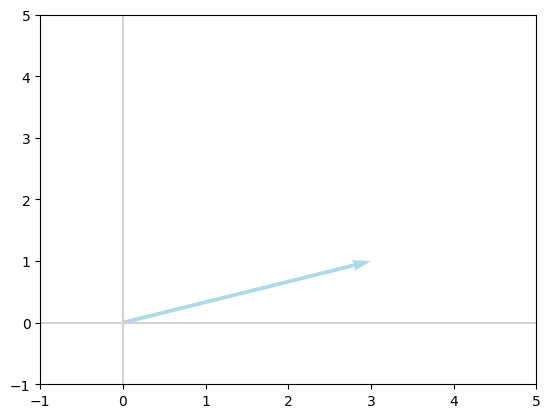

In [54]:
plot_vectors([v], ['lightblue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

Aplicar una matriz a un vector (es decir, realizar una multiplicación matriz-vector) puede transformar linealmente el vector, por ejemplo, rotarlo o reescalarlo.

La matriz identidad, introducida anteriormente, es la excepción que confirma la regla: La aplicación de una matriz identidad no transforma el vector:

In [55]:
I = np.array([[1, 0], [0, 1]])
I

array([[1, 0],
       [0, 1]])

In [56]:
Iv = np.dot(I, v)
Iv

array([3, 1])

In [57]:
v == Iv

array([ True,  True])

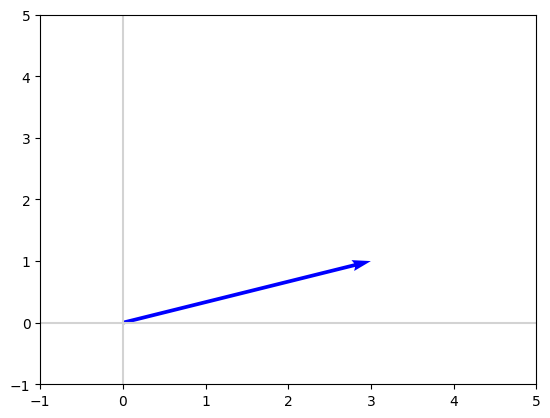

In [58]:
plot_vectors([Iv], ['blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

Por el contrario, consideremos esta matriz (llamémosla $E$) que voltea los vectores sobre el eje $x$:

In [59]:
E = np.array([[1, 0], [0, -1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [60]:
Ev = np.dot(E, v)
Ev

array([ 3, -1])

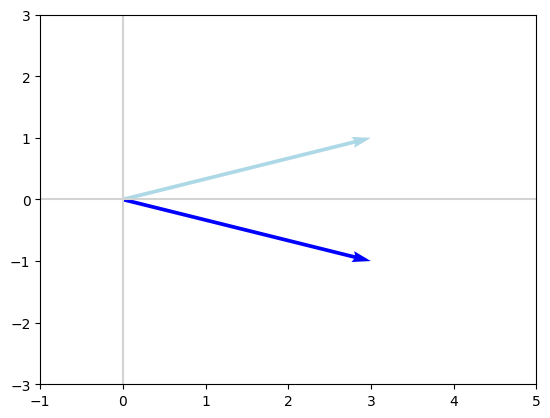

In [61]:
plot_vectors([v, Ev], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-3, 3)

O, esta matriz, $F$, que voltea vectores sobre el eje $y$:

In [62]:
F = np.array([[-1, 0], [0, 1]])
F

array([[-1,  0],
       [ 0,  1]])

In [63]:
Fv = np.dot(F, v)
Fv

array([-3,  1])

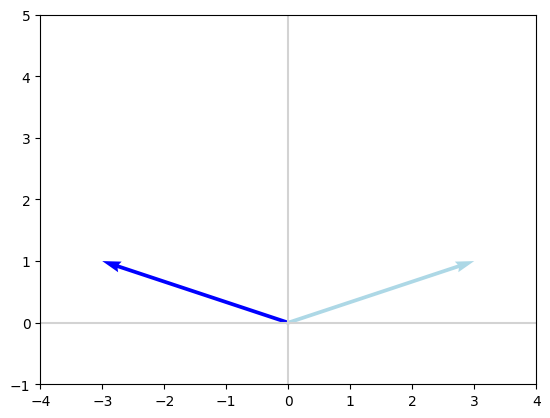

In [64]:
plot_vectors([v, Fv], ['lightblue', 'blue'])
plt.xlim(-4, 4)
_ = plt.ylim(-1, 5)

Aplicar una matriz de volteo es un ejemplo de **transformación afín**: un cambio en la geometría que puede ajustar distancias o ángulos entre vectores, pero preserva el paralelismo entre ellos.

Además de voltear una matriz sobre un eje (también conocido como *reflexión*), otras transformaciones afines comunes incluyen:

* *Escalado* (cambiando la longitud de los vectores)
* *Cizallamiento* (cambiando la longitud de los vectores como veremos con la Mona Lisa)
* Rotación

(Ver [aquí](https://stackabuse.com/affine-image-transformations-in-python-with-numpy-pillow-and-opencv/) para una destacada entrada de blog sobre transformaciones afines en Python, incluyendo cómo aplicarlas tanto a imágenes como a vectores).

Una sola matriz puede aplicar múltiples transformaciones afines simultáneamente (por ejemplo, voltear sobre un eje y rotar 45 grados). Como ejemplo, veamos qué ocurre cuando aplicamos esta matriz $A$ al vector $v$:

In [65]:
A = np.array([[-1, 4], [2, -2]])
A

array([[-1,  4],
       [ 2, -2]])

In [66]:
Av = np.dot(A, v)
Av

array([1, 4])

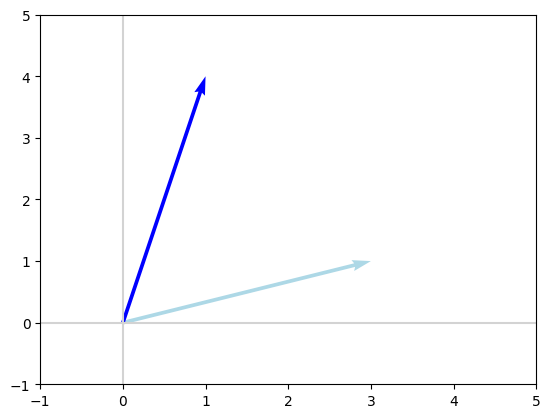

In [67]:
plot_vectors([v, Av], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

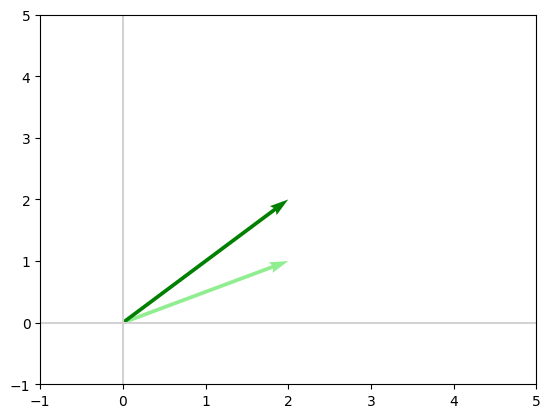

In [68]:
# Otro ejemplo de aplicar la matriz A:
v2 = np.array([2, 1])
plot_vectors([v2, np.dot(A, v2)], ['lightgreen', 'green'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

Podemos concatenar varios vectores juntos en una matriz (digamos, $V$), donde cada columna es un vector independiente. Entonces, cualquier transformación lineal que apliquemos a $V$ se aplicará independientemente a cada columna (vector):

In [69]:
v

array([3, 1])

In [70]:
# recordemos que necesitamos convertir array a 2D para transponer en columna, p.e:
np.matrix(v).T

matrix([[3],
        [1]])

In [71]:
v3 = np.array([-3, -1]) # imagen especular de v en ambos ejes
v4 = np.array([-1, 1])

In [72]:
V = np.concatenate((np.matrix(v).T,
                    np.matrix(v2).T,
                    np.matrix(v3).T,
                    np.matrix(v4).T),
                   axis=1)
V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [73]:
IV = np.dot(I, V)
IV

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [74]:
AV = np.dot(A, V)
AV

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

In [75]:
# función para convertir una columna de matriz en un vector 1D:
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)


In [76]:
vectorfy(V, 0)

array([3, 1])

In [77]:
vectorfy(V, 0) == v

array([ True,  True])

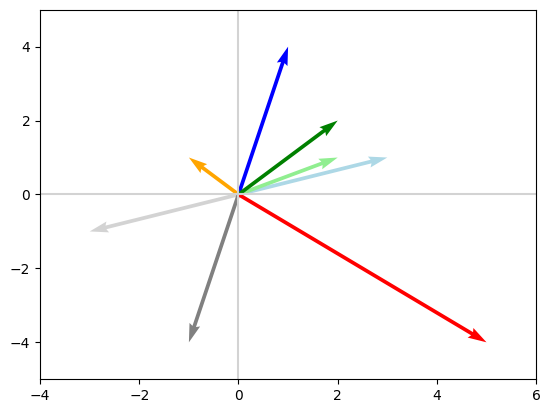

In [78]:
plot_vectors([vectorfy(V, 0), vectorfy(V, 1), vectorfy(V, 2), vectorfy(V, 3),
             vectorfy(AV, 0), vectorfy(AV, 1), vectorfy(AV, 2), vectorfy(AV, 3)],
            ['lightblue', 'lightgreen', 'lightgray', 'orange',
             'blue', 'green', 'gray', 'red'])
plt.xlim(-4, 6)
_ = plt.ylim(-5, 5)

Ahora que podemos apreciar la transformación lineal de vectores por matrices, pasemos a trabajar con vectores y valores propios...

**Volver a las slides aquí.**

### Valores y Vectores Propios

Un **vector propio** (*eigen* en alemán significa «típico»; podríamos traducir *vector propio* por «vector característico») es un vector especial $v$ tal que cuando se transforma por alguna matriz (digamos $A$), el producto $Av$ tiene exactamente la misma dirección que $v$.

Un **valor propio** es un escalar (tradicionalmente representado como $\lambda$) que simplemente escala el vector propio $v$ de tal manera que se cumple la siguiente ecuación:

$Av = \lambda v$

La forma más fácil de entenderlo es a través de un ejemplo:

In [79]:
A

array([[-1,  4],
       [ 2, -2]])

Los valores y vectores propios pueden derivarse algebraicamente (por ejemplo, con el [algoritmo QR](https://en.wikipedia.org/wiki/QR_algorithm), que fue desarrollado independientemente en los años 50 por [Vera Kublanovskaya](https://en.wikipedia.org/wiki/Vera_Kublanovskaya) y John Francis), sin embargo esto está fuera del alcance de la serie *ML Foundations*. Haremos trampas con el método NumPy `eig()`, que devuelve una tupla de:

* un vector de valores propios
* una matriz de vectores propios

In [80]:
lambdas, V = np.linalg.eig(A)

La matriz contiene tantos vectores propios como columnas de A:

In [81]:
V # each column is a separate eigenvector v

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

Con un valor propio correspondiente para cada vector propio:

In [82]:
lambdas

array([ 1.37228132, -4.37228132])

Confirmemos que $Av = \lambda v$ para el primer vector propio:

In [83]:
v = V[:,0]
v

array([0.86011126, 0.51010647])

In [84]:
lambduh = lambdas[0] # notart que "lambda" es una palabra reservada en Python
lambduh

np.float64(1.3722813232690143)

In [85]:
Av = np.dot(A, v)
Av

array([1.18031462, 0.70000958])

In [86]:
lambduh * v

array([1.18031462, 0.70000958])

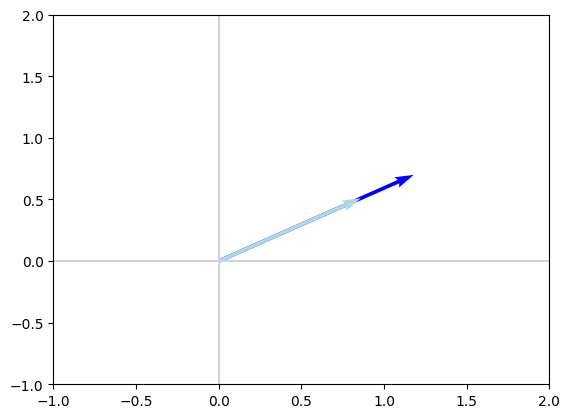

In [87]:
plot_vectors([Av, v], ['blue', 'lightblue'])
plt.xlim(-1, 2)
_ = plt.ylim(-1, 2)

Y de nuevo para el segundo vector propio de A:

In [88]:
v2 = V[:,1]
v2

array([-0.76454754,  0.64456735])

In [89]:
lambda2 = lambdas[1]
lambda2

np.float64(-4.372281323269014)

In [90]:
Av2 = np.dot(A, v2)
Av2

array([ 3.34281692, -2.81822977])

In [91]:
lambda2 * v2

array([ 3.34281692, -2.81822977])

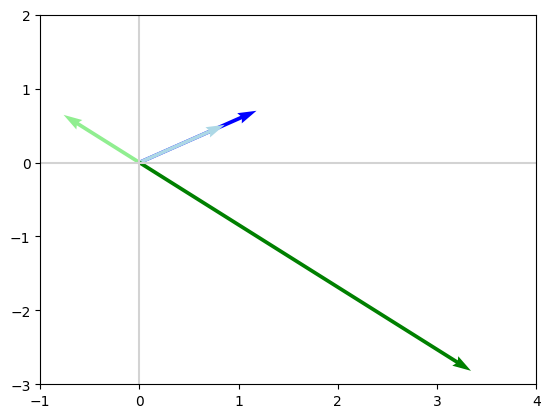

In [92]:
plot_vectors([Av, v, Av2, v2],
            ['blue', 'lightblue', 'green', 'lightgreen'])
plt.xlim(-1, 4)
_ = plt.ylim(-3, 2)

Usando el método `eig()` de PyTorch, podemos hacer exactamente lo mismo:

In [93]:
A

array([[-1,  4],
       [ 2, -2]])

In [94]:
A_p = torch.tensor([[-1, 4], [2, -2.]]) # debe ser tipo float para poder usar PyTorch eig()
A_p

tensor([[-1.,  4.],
        [ 2., -2.]])

In [95]:
lambdas_cplx, V_cplx = torch.linalg.eig(A_p) # produce números complejos porque las matrices reales pueden tener vectores propios complejos

In [96]:
V_cplx # los valores de tipo complejo con parte imaginaria «0.j» son en realidad números reales

tensor([[ 0.8601+0.j, -0.7645+0.j],
        [ 0.5101+0.j,  0.6446+0.j]])

In [97]:
V_p = V_cplx.float()
V_p

/tmp/ipython-input-97-1096125134.py:1: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at /pytorch/aten/src/ATen/native/Copy.cpp:308.)
  V_p = V_cplx.float()


tensor([[ 0.8601, -0.7645],
        [ 0.5101,  0.6446]])

In [98]:
v_p = V_p[:,0]
v_p

tensor([0.8601, 0.5101])

In [99]:
lambdas_cplx

tensor([ 1.3723+0.j, -4.3723+0.j])

In [100]:
lambdas_p = lambdas_cplx.float()
lambdas_p

tensor([ 1.3723, -4.3723])

In [101]:
lambda_p = lambdas_p[0]
lambda_p

tensor(1.3723)

In [102]:
Av_p = torch.matmul(A_p, v_p) # matmul() espera tensores tipo float
Av_p

tensor([1.1803, 0.7000])

In [103]:
lambda_p * v_p

tensor([1.1803, 0.7000])

In [104]:
v2_p = V_p[:,1]
v2_p

tensor([-0.7645,  0.6446])

In [105]:
lambda2_p = lambdas_p[1]
lambda2_p

tensor(-4.3723)

In [106]:
Av2_p = torch.matmul(A_p.float(), v2_p.float())
Av2_p

tensor([ 3.3428, -2.8182])

In [107]:
lambda2_p.float() * v2_p.float()

tensor([ 3.3428, -2.8182])

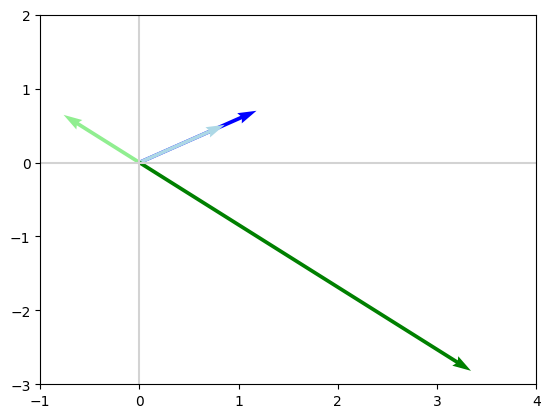

In [108]:
plot_vectors([Av_p.numpy(), v_p.numpy(), Av2_p.numpy(), v2_p.numpy()],
            ['blue', 'lightblue', 'green', 'lightgreen'])
plt.xlim(-1, 4)
_ = plt.ylim(-3, 2)

### Vectores Propios en dimensiones >2

Aunque la representación se complica en espacios de mayor dimensión, podemos encontrar y utilizar eigenvectores con más de dos dimensiones. He aquí un ejemplo en 3D (se manejan tres dimensiones en tres filas):

In [109]:
X = np.array([[25, 2, 9], [5, 26, -5], [3, 7, -1]])
X

array([[25,  2,  9],
       [ 5, 26, -5],
       [ 3,  7, -1]])

In [110]:
lambdas_X, V_X = np.linalg.eig(X)

In [111]:
V_X # cada vector propio en una de las columnas de X

array([[-0.71175736, -0.6501921 , -0.34220476],
       [-0.66652125,  0.74464056,  0.23789717],
       [-0.22170001,  0.15086635,  0.90901091]])

In [112]:
lambdas_X # un valor propio correspondiente para cada vector propio

array([29.67623202, 20.62117365, -0.29740567])

Confirmar que $Xv = \lambda v$ para un ejemplo de vector propio:

In [113]:
v_X = V_X[:,0]
v_X

array([-0.71175736, -0.66652125, -0.22170001])

In [114]:
lambda_X = lambdas_X[0]
lambda_X

np.float64(29.676232023948902)

In [115]:
np.dot(X, v_X) # producto de matrices

array([-21.12227645, -19.77983919,  -6.5792208 ])

In [116]:
lambda_X * v_X

array([-21.12227645, -19.77983919,  -6.5792208 ])

**Ejercicios**:

1. Utilizar PyTorch para confirmar $Xv = \lambda v$ para el primer vector propio de $X$.
2. Confirmar $Xv = \lambda v$ para los restantes vectores propios de $X$ (se puede utilizar NumPy o PyTorch, lo que prefiera).

In [123]:

X_p = torch.from_numpy(X).float()
lambdas_X_p, V_X_p = torch.linalg.eig(X_p)
V_X_p

for i in range(V_X_p.shape[1]):
  v_x_p = V_X_p[:,i]
  X_V_p = torch.matmul(X_p,v_x_p.float())
  lambda_V_p =lambdas_X[i]*V_X_p[:,i]
  print("X_V_p",i+1,X_V_p)
  print("lambda",i+1,lambda_V_p.float())
  print("Coinciden")


X_V_p 1 tensor([21.1223, 19.7798,  6.5792])
lambda 1 tensor([21.1223, 19.7798,  6.5792])
Coinciden
X_V_p 2 tensor([ 13.4077, -15.3554,  -3.1110])
lambda 2 tensor([ 13.4077, -15.3554,  -3.1110])
Coinciden
X_V_p 3 tensor([ 0.1018, -0.0708, -0.2703])
lambda 3 tensor([ 0.1018, -0.0708, -0.2703])
Coinciden


**Volver a las slides aquí.**

### Determinantes de Matrices 2x2

In [ ]:
X = np.array([[4, 2], [-5, -3]])
X

In [ ]:
np.linalg.det(X)

**Volver a las slides aquí.**

In [ ]:
N = np.array([[-4, 1], [-8, 2]])
N

In [ ]:
np.linalg.det(N)

In [ ]:
# Descomentar la línea siguiente da lugar a un error de "matriz singular"
# Ninv = np.linalg.inv(N)

In [ ]:
N = torch.tensor([[-4, 1], [-8, 2.]]) # must use float not int

In [ ]:
torch.det(N)

**Volver a las slides aquí.**

### Generalización de los Determinantes

In [ ]:
X = np.array([[1, 2, 4], [2, -1, 3], [0, 5, 1]])
X

In [ ]:
np.linalg.det(X)

**Volver a las slides aquí.**

### Determinantes y valores propios

In [ ]:
lambdas, V = np.linalg.eig(X)
lambdas

In [ ]:
np.product(lambdas)

**Volver a las slides aquí.**

Aquí tenemos $|\text{det}(X)|$ en NumPy:

In [ ]:
np.abs(np.linalg.det(X))

Vamos a utilizar una matriz $B$, que se compone de vectores base, para explorar el impacto de la aplicación de matrices con diferentes valores $|\text{det}(X)|$:

In [ ]:
B = np.array([[1, 0], [0, 1]])
B

In [ ]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1)],
            ['lightblue', 'lightgreen'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

Empecemos aplicando la matriz $N$ a $B$, recordando de antes que $N$ es singular:

In [ ]:
N

In [ ]:
np.linalg.det(N)

In [ ]:
NB = np.dot(N, B)
NB

In [ ]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(NB, 0), vectorfy(NB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-6, 6)
_ = plt.ylim(-9, 3)

In [ ]:
lambdas, V = np.linalg.eig(N)
lambdas

Si cualquiera de los valores propios de una matriz es cero, entonces el producto de los valores propios debe ser cero y el determinante también debe ser cero.

Vamos a aplicar $I_2$ a $B$:

In [ ]:
I

In [ ]:
np.linalg.det(I)

In [ ]:
IB = np.dot(I, B)
IB

In [ ]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(IB, 0), vectorfy(IB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [ ]:
lambdas, V = np.linalg.eig(I)
lambdas

Muy bien, aplicar una matriz identidad no es la operación más excitante del mundo. Ahora vamos a aplicar esta matriz $J$ que es más interesante:

In [ ]:
J = np.array([[-0.5, 0], [0, 2]])
J

In [ ]:
np.linalg.det(J)

In [ ]:
np.abs(np.linalg.det(J))

In [ ]:
JB = np.dot(J, B)
JB

In [ ]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(JB, 0), vectorfy(JB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [ ]:
lambdas, V = np.linalg.eig(J)
lambdas

Por último, apliquemos la matriz $D$, que escala los vectores doblando a lo largo de los ejes $x$ e $y$:

In [ ]:
D = I*2
D

In [ ]:
np.linalg.det(D)

In [ ]:
DB = np.dot(D, B)
DB

In [ ]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(DB, 0), vectorfy(DB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [ ]:
lambdas, V = np.linalg.eig(D)
lambdas

**Volver a las slides aquí.**

### Descomposición Propia

La **descomposición propia** de alguna matriz $A$ es

$A = V \Lambda V^{-1}$

Donde:

* Como en los ejemplos anteriores, $V$ es la concatenación de todos los vectores propios de $A$
* $\Lambda$ ($\lambda$ en mayúsculas) es la matriz diagonal diag($\lambda$). Obsérvese que la convención es ordenar los valores lambda en orden descendente; como resultado, el primer valor propio (y su vector propio asociado) puede ser una característica primaria de la matriz $A$.

In [ ]:
# Esto se utilizó anteriormente como una matriz X; tiene bonitos y limpios valores propios enteros...
A = np.array([[4, 2], [-5, -3]])
A

In [ ]:
lambdas, V = np.linalg.eig(A)

In [ ]:
V

In [ ]:
Vinv = np.linalg.inv(V)
Vinv

In [ ]:
Lambda = np.diag(lambdas)
Lambda

Confirmamos que $A = V \Lambda V^{-1}$:

In [ ]:
np.dot(V, np.dot(Lambda, Vinv))

La descomposición propia no es posible con todas las matrices. Y en algunos casos en los que es posible, la descomposición propia implica números complejos en lugar de números reales directos.

En el aprendizaje automático, sin embargo, normalmente trabajamos con matrices simétricas reales, que pueden descomponerse de forma conveniente y eficiente en vectores propios sólo reales y valores propios sólo reales. Si $A$ es una matriz simétrica real entonces...

$A = Q \Lambda Q^T$

...donde $Q$ es análoga a $V$ de la ecuación anterior excepto que es especial porque es una matriz ortogonal.

In [ ]:
A = np.array([[2, 1], [1, 2]])
A

In [ ]:
lambdas, Q = np.linalg.eig(A)

In [ ]:
lambdas

In [ ]:
Lambda = np.diag(lambdas)
Lambda

In [ ]:
Q

Confirmemos que $A = Q \Lambda Q^T$:

In [ ]:
np.dot(Q, np.dot(Lambda, Q.T))

(Como apunte rápido, podemos demostrar que $Q$ es una matriz ortogonal porque $Q^TQ = QQ^T = I$).

In [ ]:
np.dot(Q.T, Q)

In [ ]:
np.dot(Q, Q.T)

**Ejercicios**:

1. Utiliza PyTorch para descomponer la matriz $P$ (abajo) en sus componentes $V$, $\Lambda$, y $V^{-1}$. Confirmar que $P = V \Lambda V^{-1}$.
2. Utilizar PyTorch para descomponer la matriz simétrica $S$ (abajo) en sus componentes $Q$, $\Lambda$ y $Q^T$. Confirmar que $S = Q \Lambda Q^T$.

In [ ]:
P = torch.tensor([[25, 2, -5], [3, -2, 1], [5, 7, 4.]])
P

In [ ]:
S = torch.tensor([[25, 2, -5], [2, -2, 1], [-5, 1, 4.]])
S

**Volver a las slides aquí.**

## Segmento 3: Operaciones Matriciales en ML

### Descomposición en Valor Singular (SVD)

Como en las diapositivas, SVD de la matriz $A$ es:

$A = UDV^T$

Donde:

* $U$ es una matriz ortogonal $m \times m$; sus columnas son los **vectores singulares izquierdos** de $A$.
* $V$ es una matriz ortogonal $n \times n$; sus columnas son los **vectores singulares derechos** de $A$.
* $D$ es una matriz diagonal $m \times n$; los elementos a lo largo de su diagonal son los **valores singulares** de $A$.

In [ ]:
A = np.array([[-1, 2], [3, -2], [5, 7]])
A

In [ ]:
U, d, VT = np.linalg.svd(A) # V ya está transpuesta!

In [ ]:
U

In [ ]:
VT

In [ ]:
d

In [ ]:
np.diag(d)

$D$ debe tener las mismas dimensiones que $A$ para que sea posible la multiplicación de matrices $UDV^T$:


In [ ]:
D = np.concatenate((np.diag(d), [[0, 0]]), axis=0)
D

In [ ]:
np.dot(U, np.dot(D, VT))

La SVD y la eigencomposición están estrechamente relacionadas:

* Vectores singulares izquierdos de $A$ = vectores propios de $AA^T$.
* Vectores singulares derechos de $A$ = vectores propios de $A^TA$.
* Valores singulares no nulos de $A$ = raíces cuadradas de los valores propios de $AA^T$ = raíces cuadradas de los valores propios de $A^TA$.

**Ejercicio**: Utilizando la matriz `P` de los ejercicios PyTorch anteriores, demuestra que estas tres ecuaciones de SVD-eigendecomposición son ciertas.

### Compresión de Imágenes con SVD

La sección presenta código adaptado de [Frank Cleary's](https://gist.github.com/frankcleary/4d2bd178708503b556b0).

In [ ]:
from PIL import Image

Foto de Oboe, el terrier de Jon Krohn, con el libro *Aprendizaje Profundo Ilustrado*:

In [ ]:
! wget https://raw.githubusercontent.com/joanby/DLTFpT/master/notebooks/oboe-with-book.jpg

In [ ]:
img = Image.open('oboe-with-book.jpg')
_ = plt.imshow(img)

Convertir la imagen a escala de grises para no tener que lidiar con la complejidad de múltiples canales de color:

In [ ]:
imggray = img.convert('LA')
_ = plt.imshow(imggray)

Convierte los datos en una matriz numpy, que no afecta a los datos de la imagen:

In [ ]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
_ = plt.imshow(imgmat, cmap='gray')

Calcular la SVD de la imagen:

In [ ]:
U, sigma, V = np.linalg.svd(imgmat)

Al igual que los valores propios se ordenan en orden descendente en diag($\lambda$), también los valores singulares, por convención, se ordenan en orden descendente en $D$ (o, en este código, diag($\sigma$)). Así, el primer vector singular izquierdo de $U$ y el primer vector singular derecho de $V$ pueden representar la característica más prominente de la imagen:

In [ ]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
_ = plt.imshow(reconstimg, cmap='gray')

Los vectores singulares adicionales mejoran la calidad de la imagen:

In [ ]:
for i in [2, 4, 8, 16, 32, 64]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

Con 64 vectores singulares, la imagen se reconstruye bastante bien, aunque la huella de datos es mucho menor que la de la imagen original:

In [ ]:
imgmat.shape

In [ ]:
full_representation = 4032*3024
full_representation

In [ ]:
svd64_rep = 64*4032 + 64 + 64*3024
svd64_rep

In [ ]:
svd64_rep/full_representation

En concreto, la imagen representada como 64 vectores singulares ocupa el 3,7% del tamaño del original.

Además de imágenes, podemos utilizar vectores singulares para la compresión con pérdidas de otros tipos de archivos multimedia.

**Volver a las slides aquí.**

### La Pseudoinversa de Moore-Penrose

Vamos a calcular el pseudoinverso $A^+$ de alguna matriz $A$ utilizando la fórmula de las diapositivas:

$A^+ = VD^+U^T$

In [ ]:
A

Como se mostró anteriormente, el método NumPy SVD devuelve $U$, $d$ y $V^T$:

In [ ]:
U, d, VT = np.linalg.svd(A)

In [ ]:
U

In [ ]:
VT

In [ ]:
d

Para crear $D^+$, primero invertimos los valores distintos de cero de $d$:

In [ ]:
D = np.diag(d)
D

In [ ]:
1/8.669

In [ ]:
1/4.104

...y luego tomaríamos el tranpuesto de la matriz resultante.

Como $D$ es una matriz diagonal, esto se puede hacer en un solo paso invirtiendo $D$:

In [ ]:
Dinv = np.linalg.inv(D)
Dinv

$D^+$ debe tener las mismas dimensiones que $A^T$ para que sea posible la multiplicación de matrices $VD^+U^T$:

In [ ]:
Dplus = np.concatenate((Dinv, np.array([[0, 0]]).T), axis=1)
Dplus

(Recordemos que $D$ debe tener las mismas dimensiones que $A$ para $UDV^T$ de SVD, pero para MPP $U$ y $V$ han intercambiado lados alrededor de la matriz diagonal).

Ahora tenemos todo lo que necesitamos para calcular $A^+$ con $VD^+U^T$:

In [ ]:
np.dot(VT.T, np.dot(Dplus, U.T))

Trabajar esta derivación es útil para entender cómo funcionan los pseudoinversos de Moore-Penrose, pero como era de esperar NumPy se carga con un método existente `pinv()`:

In [ ]:
np.linalg.pinv(A)

**Ejercicio**

Utiliza el método `torch.svd()` para calcular el pseudoinverso de `A_p`, confirmando que tu resultado coincide con la salida de `torch.pinverse(A_p)`:

In [ ]:
A_p = torch.tensor([[-1, 2], [3, -2], [5, 7.]])
A_p

In [ ]:
torch.pinverse(A_p)

**Volver a las slides aquí.**

En los problemas de regresión, normalmente tenemos muchos más casos ($n$, o filas de $X$) que características que predecir (columnas de $X$). Resolvamos un ejemplo en miniatura de tal situación de sobredeterminación.

Tenemos ocho puntos de datos ($n$ = 8):

In [ ]:
x1 = [0, 1, 2, 3, 4, 5, 6, 7.] # E.g.: Dosage of drug for treating Alzheimer's disease
y = [1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37] # E.g.: Patient's "forgetfulness score"

In [ ]:
title = 'Ensayo Clínico'
xlabel = 'Dosis del Fármaco (mL)'
ylabel = 'Olvido'

In [ ]:
fig, ax = plt.subplots()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
_ = ax.scatter(x1, y)

Aunque parece que sólo hay un predictor ($x_1$), nuestro modelo requiere un segundo (llamémoslo $x_0$) para permitir una intersección $y$. Sin esta segunda variable, la línea que ajustamos al gráfico tendría que pasar por el origen (0, 0). La intersección $y$ es constante en todos los puntos, por lo que podemos establecerla igual a `1` en todos los puntos:

In [ ]:
x0 = np.ones(8)
x0

Concatenar $x_0$ y $x_1$ en una matriz $X$:

In [ ]:
X = np.concatenate((np.matrix(x0).T, np.matrix(x1).T), axis=1)
X

Por las diapositivas, sabemos que podemos calcular los pesos $w$ mediante la ecuación $w = X^+y$:

In [ ]:
w = np.dot(np.linalg.pinv(X), y)
w

La primera ponderación corresponde a la intersección $y$ de la recta, que suele denominarse $b$:

In [ ]:
b = np.asarray(w).reshape(-1)[0]
b

Mientras que el segundo peso corresponde a la pendiente de la línea, que se suele denotar como $m$:

In [ ]:
m = np.asarray(w).reshape(-1)[1]
m

Con los pesos podemos trazar la recta para confirmar que se ajusta a los puntos:

In [ ]:
fig, ax = plt.subplots()

plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

ax.scatter(x1, y)

x_min, x_max = ax.get_xlim()
y_at_xmin = m*x_min + b
y_at_xmax = m*x_max + b

ax.set_xlim([x_min, x_max])
_ = ax.plot([x_min, x_max], [y_at_xmin, y_at_xmax], c='C01')

**NO VOLVEMOS a las slides aquí. Seguimos!!**

### El Operador Traza

Se denomina Tr($A$). Simplemente la suma de los elementos diagonales de una matriz: $$\sum_i A_{i,i}$$

In [ ]:
A = np.array([[25, 2], [5, 4]])
A

In [ ]:
25 + 4

In [ ]:
np.trace(A)

El operador de traza tiene una serie de propiedades útiles que resultan prácticas al reordenar ecuaciones de álgebra lineal, por ejemplo

* Tr($A$) = Tr($A^T$)
* Suponiendo que las formas de la matriz se alinean: Tr($ABC$) = Tr($CAB$) = Tr($BCA$)

En particular, el operador de traza puede proporcionar una forma conveniente de calcular la norma de Frobenius de una matriz: $$||A||_F = \sqrt{\mathrm{Tr}(AA^\mathrm{T})}$$

**Ejercicios**

Con la matriz `A_p` proporcionada a continuación:

1. Utiliza el método de trazas de PyTorch para calcular la traza de `A_p`.
2. Utilizar el método de la norma de Frobenius de PyTorch y el método de la traza para demostrar que $||A||_F = \sqrt{\mathrm{Tr}(AA^\mathrm{T})}$.

In [ ]:
A_p

**Volver a las slides aquí.**

### Análisis de Componentes Principales

El ejemplo de ACP está adaptado de [aquí](https://jupyter.brynmawr.edu/services/public/dblank/CS371%20Cognitive%20Science/2016-Fall/PCA.ipynb).

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
iris.data.shape

In [ ]:
iris.get("feature_names")

In [ ]:
iris.data[0:6,:]

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
X = pca.fit_transform(iris.data)

In [ ]:
X.shape

In [ ]:
X[0:6,:]

In [ ]:
_ = plt.scatter(X[:, 0], X[:, 1])

In [ ]:
iris.target.shape

In [ ]:
iris.target[0:6]

In [ ]:
unique_elements, counts_elements = np.unique(iris.target, return_counts=True)
np.asarray((unique_elements, counts_elements))

In [ ]:
list(iris.target_names)

In [ ]:
_ = plt.scatter(X[:, 0], X[:, 1], c=iris.target)

**Volver a las slides aquí.**